# Metadata

Title: Final Project for DS 5100

Date: 15 Jul 22

Name: Matt Manner

Student ID: xkv3na

Notebook URL: https://github.com/mattm3456/monte_carlo_simulator/blob/main/final-project-submission.ipynb

Repo URL: https://github.com/mattm3456/monte_carlo_simulator

# Monte Carlo Module

In [ ]:
import numpy as np
import pandas as pd
class Die():
    '''
    Die class takes in a list of numbers (floats or integers), strings, or a combination of both. There are four methods in this class, including the initializing method
    '''
    
    def __init__(self, faces):
        
        '''
        Initializing the die requires a list of faces, which can be numbers or strings.
        Example input: testing_die = Die([1, 2.5, 'cat'])
        Example outputs: 
        testing_die.faces = [1,2.5,'cat']
        testing_die.weightslist = [1,1,1]
        '''
        
        for i in faces:
            if type(i) != float and type(i) != int and type(i) != str:
                print("Die must be a list of numbers or strings")
                
        self.faces = faces
        self.weightslist = [1] * len(faces)
        self.die = pd.DataFrame({'face': self.faces,'weights': self.weightslist})
    
    def change_weight(self, j, new_weight):
        '''
        change_weight requires a face input and a new weight for that face. The new weight must be a number, while the face can be either a string or a number (provided the face actually exists for the die). 
        Example input: testing_die.change_weight('cat',3)
        Example output: testing_die.weightslist = [1,1,3]
        '''
        
        if type(new_weight) != float and type(new_weight) != int:
            print('This is not a valid weight')
        elif type(new_weight) == float or type(new_weight) == int:
            if j in self.faces:
                index_finder = self.faces.index(j)
                self.weightslist[index_finder] = new_weight
            elif j not in self.faces:
                print("This face is not in the die")
        
        self.die = pd.DataFrame({'face': self.faces,'weights': self.weightslist})
        
    def play_game(self, number_rolls = 1):
        '''
        play_game returns a list of outcomes from a specified number of rolls for the Die object (default number of rolls is 1). The rolls use the object's weights to determine roll outcomes.
        Example input: testing_die.play_game(5)
        Example output: [2.5,'cat','cat',1,'cat']
        '''
        
        game_results = [self.die.face.sample(weights=self.weightslist).values[0] for i in range(number_rolls)]
        return(game_results)
        
    def display_dice(self):
        
        '''
        display_dice returns the dataframe of die faces and corresponding weights.
        '''
        print(self.die)
        
#############

class Game():
    '''
    Game class takes in a list of dice. This class is used to actually play the game, and can return the results of the game in either a narrow or wide dataframe.
    '''
    
    def __init__(self, dice):
        '''
        The initializer for the Game class requires input of a list of one or more Die objects.
        Example input: 
        die1 = Die([1,2,3])
        die2 = Die([4,5,6])
        die3 = Die([7,8,9])
        test_game = Game([die1, die2, die3])
        '''
        self.dice = dice
        
    def play_the_game(self, n_plays):
        '''
        play_the_game requires an input of n_plays, which is the number of desired rolls. Each die object instantiated will receive an equal number of rolls. 
        Example input: test_game.play_the_game(5)
        Example output: __games_list would be a DataFrame with "Roll Number" as the index (1-5), "Die 1", "Die 2", and "Die 3" as column names, with each value being the result of that specific roll of that specific die. 
        '''
        self.n_plays = n_plays
        dice_count = 1
        global dice_names 
        dice_names = []
        global numb_roll 
        numb_roll = []
        global dices 
        dices = {}
        global __games_list 
        __games_list = pd.DataFrame(dices)

        for i in self.dice:
            die_name = 'Die' + str(dice_count)
            dice_names.append(die_name)
            dices[die_name] = []
            dice_count += 1    
   
        c = 0

        for dice_piece in self.dice:
            c += 1
            col = []
            for play in range(self.n_plays):
                die_name = 'Die ' + str(c)
                roll = dice_piece.play_game()
                if c == 1:
                    numb_roll.append(play + 1)
                col.append(roll)

            __games_list[die_name] = col
            __games_list[die_name] = __games_list[die_name].str[0]
        __games_list['Roll Number'] = numb_roll
                
        __games_list.set_index("Roll Number", inplace = True)
        self.games_list = __games_list
        return __games_list
        
    def show_df(self, width = 'W'):
        '''show_df is used to display the results from the games, in a chosen format (narrow or wide).
        
        Example input: test_game.show_df('W') would show the game result in the default format (same as above) whereas test_game.show_df('N') would be a stacked version of the default, with a 2-column index, one column for roll number and one for die number.
        '''
        
        if width == "N" or width == "W" or width == "":
            dummy_variable = 1
        try:
            dummy_variable 
        except: 
            print('Width must be set to either N (for narrow) or W (for wide). Default is set to wide')

        if width == "W" or width == "":
            return __games_list
        elif width == "N":
            games_narrow = __games_list.stack().to_frame('Face Rolled')
            return games_narrow
            
#############

from collections import Counter
from IPython.display import display

class Analyzer():
    '''
    Analyzer class is used to show game results in a different format, and also to show certain statistics about the game. It requires an instantiated Game object as input.
    '''
    
    def __init__(self, played_game):
        '''
        played_game would be an instantiated Game object from the previous class. In order to use most of the methods in the Analyzer class, the Game object must also be actually played (i.e. run the play_the_game method from the Game class).
        Example input: test_analyzer = Analyzer(test_game)
        '''
        
        self.played_game = played_game
        global Play 
        Play = self.played_game.show_df()
    
    def jackpot(self):
        '''
        jackpot returns two outputs: a dataframe and an integer. The dataframe, self.jackpots_df, is the subset of the Game results dataframe where all the dice showed the same value (e.g. you rolled five 6's). The integer is the length of self.jackpots_df, which provides the total number of jackpots for your given game play.
        This method requires the display package from IPython.
        '''
        
        Jackpots = Play.eq(Play.iloc[:, 0], axis=0).all(1)
        Jackpots = Jackpots[Jackpots]
        JackPots_DF = display(Play.loc[Jackpots.index])
        self.jackpots_df = JackPots_DF
        self.number_of_jackpots = len(Jackpots)
        print(self.number_of_jackpots)
        return self.jackpots_df
        
    def combos(self):
        '''
        combos returns the unique permutations present in your rolls, ordered by frequency. It considers order, meaning that if you roll 5 dice with a result of 1-2-3-4-5, that is considered different than 5-4-3-2-1. 
        The output of this will be a multi-index dataframe, with each Die as an index. The value for each die will appear in the index columns for each row, and the data column will be the number of occurences for that permutation of die faces rolled.
        '''
        
        combos_rolls2 = pd.DataFrame(Play.value_counts())
        combos_rolls2.columns =['Number of Occurences']
        combos_rolls2.apply(Counter, axis='columns').value_counts()
        combonations = Play.apply(lambda x: pd.Series(sorted(x)), 1)\
 .value_counts()\
 .to_frame('n')
        self.combonations = combonations
        self.combinations = combos_rolls2

    def counts_per_roll(self):
        '''
        counts_per_roll gives another dataframe of the played game results. This one will have each face present in the die set as a column, the roll number as an index, and the number of times each face appears in the roll as the value.
        '''
        
        self.counts_table = Play.apply(pd.Series.value_counts, axis=1).fillna(0)
        return self.counts_table
        

# Test Module

In [ ]:
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class DieTestSuite(unittest.TestCase):
    def test_1_change_weight(self): 
         '''
        tests whether the change_weight function works. Changes weight #3 in a test die to 10. Confirms that resulting weights_list is [1,1,10,1,1,1]
        '''
        TestDie1 = Die([1,2,3,4,5,6])
        TestDie1.change_weight(3, 10)
        actual = TestDie1.weightslist
        expected = [1,1,10,1,1,1]
        message = "Test failed: weight change didn't work properly !"
        self.assertEqual(actual, expected, message)
    
    def test_2_play_game(self):
        '''
        Tests the play_game method by setting all weights except face #1 to 0. This means that all rolls will result in a value of 1. Playing the game 5 times should result in a games outcome list of [1,1,1,1,1].
        '''
        TestDie1 = Die([1,2,3,4,5,6])
        TestDie1.change_weight(2,0)
        TestDie1.change_weight(3,0)
        TestDie1.change_weight(4,0)
        TestDie1.change_weight(5,0)
        TestDie1.change_weight(6,0)
        TestDie1.play_game(5)
        actual = TestDie1.play_game(5)
        expected = [1,1,1,1,1]
        message = "Gameplay didn't work properly !"
        self.assertEqual(actual, expected, message)
        
        
    def test_3_display_dice(self):
        '''
        Tests the display_dice method, to confirm that die dictionary is made as expected.
        '''
        TestDie1 = Die([1,2,3,4,5,6])
        TestDie1.display_dice()
        actual = TestDie1.die
        expected = {'face':[1,2,3,4,5,6], 'weights': [1,1,1,1,1,1]}
        message = "Die dictionary not made properly!"
        self.assertEqual(actual, expected, message)
        
###########################        
class GameTestSuite(unittest.TestCase):
    def test_1_play_the_game_and_show(self): 
        '''
        Plays a game and confirms that output is in proper format. Converts the outcome dataframe to a list and compares against a hard-coded analogous list.
        '''
        TestDie1 = Die([1])
        TestDie2 = Die([2])
        TestDie3 = Die([3])
        TestGame = Game([TestDie1, TestDie2, TestDie3])
        TestGame.play_the_game(5)
        actual = TestGame.games_list.values.tolist()
        Testdf = pd.DataFrame({'Roll Number':[1,2,3,4,5], 'Die 1': [1,1,1,1,1], 'Die 2': [2,2,2,2,2], 'Die 3':[3,3,3,3,3]})
        Testdf = Testdf.set_index("Roll Number")
        expected = Testdf.values.tolist()
        message = "Gameplay method not working properly !"
        self.assertEqual(actual, expected, message)
    
    def test_2_show_df_W(self):
        '''
        Shows a dataframe converted to list format as in previous test.
        '''
        TestDie1 = Die([1])
        TestDie2 = Die([2])
        TestDie3 = Die([3])
        TestGame = Game([TestDie1, TestDie2, TestDie3])
        TestGame.play_the_game(5)
        actual = TestGame.show_df("W").values.tolist()
        Testdf = pd.DataFrame({'Roll Number':[1,2,3,4,5], 'Die 1': [1,1,1,1,1], 'Die 2': [2,2,2,2,2], 'Die 3':[3,3,3,3,3]})
        Testdf = Testdf.set_index("Roll Number")
        expected = Testdf.values.tolist()
        message = "Gameplay dataframe creation error"
        self.assertEqual(actual, expected, message)
        
    def test_3_show_df_N(self):
        '''
        Similar to test_3_show_df_W, but uses a narrow DataFrame to make the list.
        '''
        TestDie1 = Die([1])
        TestDie2 = Die([2])
        TestDie3 = Die([3])
        TestGame = Game([TestDie1, TestDie2, TestDie3])
        TestGame.play_the_game(5)
        actual = TestGame.show_df("N").values.tolist()
        testlist = [[1],[2],[3]]
        expected = testlist * 5
        message = "Converting to narrow dataframe error!"
        self.assertEqual(actual, expected, message)    

#####################
class AnalyzerTestSuite(unittest.TestCase):
    def test_1_number_of_jackpots(self): 
        '''
        Initializes a Game and Analyzer with 3 Die with only 1 face each. Should roll a Jackpot every roll, so this test confirms that.
        '''
        TestDie1 = Die([1])
        TestDie2 = Die([1])
        TestDie3 = Die([1])
        TestGame = Game([TestDie1, TestDie2, TestDie3])
        TestGame.play_the_game(5)
        TestAnalyzer = Analyzer(TestGame)
        TestAnalyzer.jackpot()
        actual = TestAnalyzer.number_of_jackpots
        expected = 5
        message = "Jackpots not properly running"
        self.assertEqual(actual, expected, message)

    def test_2_combinations(self):
        '''
        This test confirms that every roll of 3 equivalent single-faced dice returns the same combination. The expected outcome of the TestAnalyzer is a dataframe of 1 combination, 5 times.
        '''
        TestDie1 = Die([1])
        TestDie2 = Die([1])
        TestDie3 = Die([1])
        TestGame = Game([TestDie1, TestDie2, TestDie3])
        TestGame.play_the_game(5)
        TestAnalyzer = Analyzer(TestGame)
        TestAnalyzer.combos()
        actual = TestAnalyzer.combinations.values.tolist()
        expected = [[5]]
        message = "Not properly calculating combinations!"
        self.assertEqual(actual, expected, message)
        
    def test_3_values_per_roll(self):
        '''
        test_3_values_per_roll confirms the counts_per_roll method in the Analyzer class. Checks that there is one column for the one existing face (1), and that all 3 dice rolled 1 for each roll.
        '''
        TestDie1 = Die([1])
        TestDie2 = Die([1])
        TestDie3 = Die([1])
        TestGame = Game([TestDie1, TestDie2, TestDie3])
        TestGame.play_the_game(5)
        TestAnalyzer = Analyzer(TestGame)
        TestAnalyzer.counts_per_roll()
        actual = TestAnalyzer.counts_table.values.tolist()
        expected = pd.DataFrame({"Roll Number":[1,2,3,4,5], "1":[3,3,3,3,3]}).set_index("Roll Number").values.tolist()
        message = "Not properly calculating values for each roll !"
        self.assertEqual(actual, expected, message)
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

# Test Results

In [ ]:
(base) mattmanner@Matts-MacBook-Air Final_Project_DS5100 % Python montecarlo_tests.py
test_1_number_of_jackpots (__main__.AnalyzerTestSuite) ...              Die 1  Die 2  Die 3
Roll Number                     
1                1      1      1
2                1      1      1
3                1      1      1
4                1      1      1
5                1      1      1
5
ok
test_2_combinations (__main__.AnalyzerTestSuite) ... ok
test_3_values_per_roll (__main__.AnalyzerTestSuite) ... ok
test_1_change_weight (__main__.DieTestSuite) ... ok
test_2_play_game (__main__.DieTestSuite) ... ok
test_3_display_dice (__main__.DieTestSuite) ...    face  weights
0     1        1
1     2        1
2     3        1
3     4        1
4     5        1
5     6        1
ok
test_1_play_the_game_and_show (__main__.GameTestSuite) ... ok
test_2_show_df_W (__main__.GameTestSuite) ... ok
test_3_show_df_N (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.108s

OK

# Scenarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

You have successfully installed the Monte Carlo modules


In [2]:
FairCoin = Die(['H','T'])
FairGame = Game([FairCoin, FairCoin, FairCoin])
FairGame.play_the_game(1000)
FairAnalyzer = Analyzer(FairGame)
FairJackpots = FairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
17,H,H,H
24,T,T,T
28,H,H,H
29,H,H,H
32,H,H,H
...,...,...,...
985,H,H,H
992,H,H,H
995,H,H,H


288


In [3]:
UnfairCoin1 = Die(['H','T'])
UnfairCoin1.change_weight("H",5)
UnfairGame = Game([FairCoin, FairCoin, UnfairCoin1])
UnfairGame.play_the_game(1000)
UnfairAnalyzer = Analyzer(UnfairGame)
UnfairJackpots = UnfairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
1,H,H,H
3,T,T,T
4,H,H,H
7,H,H,H
21,H,H,H
...,...,...,...
979,T,T,T
985,H,H,H
990,H,H,H


251


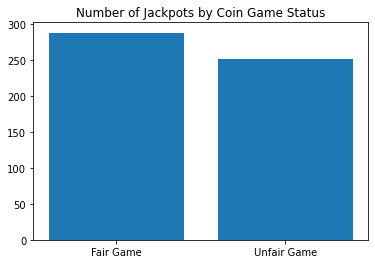

In [4]:
name_of_game = ['Fair Game', 'Unfair Game']
game_result = [FairAnalyzer.number_of_jackpots, UnfairAnalyzer.number_of_jackpots]
game_result
plt.bar(name_of_game,game_result)
plt.title('Number of Jackpots by Coin Game Status')
plt.show()

In [5]:
FairDie = Die([1,2,3,4,5,6])
UnfairDie1 = Die([1,2,3,4,5,6])
UnfairDie2 = Die([1,2,3,4,5,6])
UnfairDie1.change_weight(6,5)
UnfairDie2.change_weight(1,5)

In [6]:
FairDieSet = ([FairDie, FairDie, FairDie, FairDie, FairDie])
FairDiceGame = Game(FairDieSet)
FairDiceGame.play_the_game(10000)
FairDiceAnalyzer = Analyzer(FairDiceGame)
FairDiceJackpots = FairDiceAnalyzer.jackpot()
FairDiceAnalyzer.combos()
Top10Fair = FairDiceAnalyzer.combonations.head(10)
Top10Fair

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
982,3,3,3,3,3
1277,5,5,5,5,5
1294,2,2,2,2,2
1913,2,2,2,2,2
3291,2,2,2,2,2
4731,5,5,5,5,5
5237,2,2,2,2,2
8683,4,4,4,4,4


8


n
0 1 2 3 4     
1 2 3 5 6  162
2 3 4 5 6  156
1 2 3 4 5  150
    4 5 6  148
  3 4 5 6  146
  2 3 4 6  128
    4 6 6   98
  1 3 4 6   96
  2 3 3 5   91
    4 5 5   91

In [7]:
top_10_fair = Top10Fair.index.to_list()
top_10_fair_occurences = Top10Fair['n'].to_list()
top_10_fair_occurences

[162, 156, 150, 148, 146, 128, 98, 96, 91, 91]

Text(0.5, 1.0, 'Most Common Unique Combinations for 10000 Dice Rolls in Fair Game')

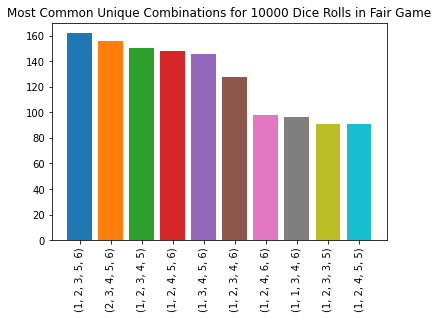

In [8]:
x_axis = np.array(top_10_fair)
y_axis = top_10_fair_occurences
for i in zip(range(len(top_10_fair))):
    plt.bar(i, top_10_fair_occurences[i[0]]);
plt.xticks(range(10), top_10_fair, rotation = 'vertical'); plt.title('Most Common Unique Combinations for 10000 Dice Rolls in Fair Game')

In [9]:
UnfairDieSet = ([UnfairDie1, UnfairDie1, UnfairDie2, FairDie, FairDie])
UnfairDiceGame = Game(UnfairDieSet)
UnfairDiceGame.play_the_game(10000)
UnfairDiceAnalyzer = Analyzer(UnfairDiceGame)
UnfairDiceJackpots = UnfairDiceAnalyzer.jackpot()
UnfairDiceAnalyzer.combos()
Top10Unfair = UnfairDiceAnalyzer.combonations.head(10)
Top10Unfair

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1941,6,6,6,6,6
2206,6,6,6,6,6
2548,3,3,3,3,3
3655,6,6,6,6,6
3798,6,6,6,6,6
4532,6,6,6,6,6
4657,6,6,6,6,6
5317,2,2,2,2,2
6003,2,2,2,2,2


11


n
0 1 2 3 4     
1 3 4 6 6  214
  2 5 6 6  204
  4 5 6 6  199
  2 3 6 6  184
  1 4 6 6  180
  2 4 5 6  171
  3 4 5 6  165
  2 4 6 6  165
  1 3 6 6  162
  2 3 5 6  160

In [10]:
top_10_unfair = Top10Unfair.index.to_list()
top_10_unfair_occurences = Top10Unfair['n'].to_list()

Text(0.5, 1.0, 'Most Common Unique Combinations for 10000 Dice Rolls in Unfair Game')

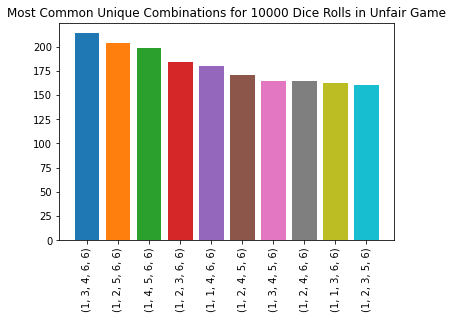

In [11]:
unfair_x_axis = np.array(top_10_unfair)
unfair_y_axis = top_10_unfair_occurences
for i in zip(range(len(top_10_unfair))):
    plt.bar(i, top_10_unfair_occurences[i[0]]);
plt.xticks(range(10), top_10_unfair, rotation = 'vertical'); plt.title('Most Common Unique Combinations for 10000 Dice Rolls in Unfair Game')

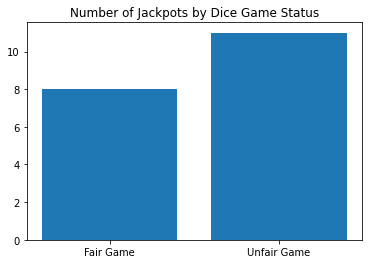

In [12]:
name_of_dice_game = ['Fair Game', 'Unfair Game']
dice_game_result = [FairDiceAnalyzer.number_of_jackpots, UnfairDiceAnalyzer.number_of_jackpots]
plt.bar(name_of_dice_game,dice_game_result)
plt.title('Number of Jackpots by Dice Game Status')
plt.show()

In [13]:
import string
Alphabet_string = string.ascii_lowercase[:26]
Alphabet_list = [i for i in Alphabet_string]
alphabet_die = Die([i for i in Alphabet_string])
weights_df = pd.DataFrame({"Letter": Alphabet_list, "Weighted": [8.4966,2.072,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,.2902,1.7779,0.2722]})
Weights = weights_df['Weighted']
alphabet_die.weightslist = [Weights[i] for i in range(len(alphabet_die.weightslist))]
Alphabets_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
Alphabets_game.play_the_game(1000)

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1,e,s,r,h,l
2,s,n,m,p,e
3,n,e,e,w,i
4,g,u,p,d,o
5,n,e,t,n,c
...,...,...,...,...,...
996,r,e,e,c,r
997,t,r,s,l,i
998,a,i,t,t,n


In the interest of time, I looked through just 100 rows, and found 2 combinations that could be considered actual English words. A rate of 2% sounds about right.

# Directory Listing

In [14]:
! ls -lR

total 408
-rw-r--r--  1 mattmanner  staff   1066 Jul 11 22:46 LICENSE
-rw-r--r--@ 1 mattmanner  staff   7461 Jul 13 11:10 README.md
drwxr-xr-x@ 5 mattmanner  staff    160 Jul 12 09:01 __pycache__
drwxr-xr-x@ 4 mattmanner  staff    128 Jul 12 11:19 build
drwxr-xr-x@ 3 mattmanner  staff     96 Jul 12 11:18 dist
-rw-r--r--  1 mattmanner  staff  99021 Jul 13 15:31 final-project-submission.ipynb
drwxr-xr-x@ 7 mattmanner  staff    224 Jul 13 15:27 montecarlo
drwxr-xr-x@ 7 mattmanner  staff    224 Jul 12 11:18 montecarlo.egg-info
-rw-r--r--  1 mattmanner  staff  75871 Jul 12 21:06 montecarlo_demo.ipynb
-rw-r--r--@ 1 mattmanner  staff   6178 Jul 13 10:53 montecarlo_tests.py
-rw-r--r--@ 1 mattmanner  staff   1026 Jul 11 16:34 project_unit_testing_results.txt
-rw-r--r--@ 1 mattmanner  staff    380 Jul 12 17:33 setup.py

./__pycache__:
total 56
-rw-r--r--  1 mattmanner  staff  4181 Jul 11 16:01 Die11Jul.cpython-39.pyc
-rw-r--r--  1 mattmanner  staff  4192 Jul 11 16:23 Monte_Carlo_Classes.cpython-

# Installation Output Listing

In [1]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

You have successfully installed the Monte Carlo modules
